In [1]:
# Connecting through API Key

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:

# Download Dataset from kaggle through API (Application Programming Interface)

!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:31<00:00, 41.8MB/s]
100% 1.06G/1.06G [00:31<00:00, 36.0MB/s]


In [3]:
# Extract all folders and files from Zip File

import zipfile
zip_rfe = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_rfe.extractall('/content')
zip_rfe.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/dogs-vs-cats.zip' mode='r'>>

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

In [5]:

conv_base = VGG16(
    weights='imagenet',  # take same weight on which VGG16 was trained
    include_top=False,   # Not inclue fully connected layer only use convolutional and pooling layers
    input_shape=(150, 150, 3))


58889256/58889256 [==============================] - 2s 0us/step


In [6]:
# Summary of VGG16 model

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

**To see the architecture of fully connected layers use include_top=True parameter while importing pretrained model.**

In [7]:
# Building fully connected layes for VGG16

model = Sequential()

model.add(conv_base) # Take convolutional and pooling layers of VGG16
model.add(Flatten()) # Perform flattening
model.add(Dense(256, activation='relu'))  # First hidden layer with 256 neuron and perfrom 'relu' activation function on it
model.add(Dense(1, activation='sigmoid')) # Hidden layer with 1 neuron and activation function is sigmoid

In [8]:
conv_base.trainable=False

**Do not build VGG16 from strach only customize their fully connected layers.**

In [9]:
# importing libraries for data augmentation and creating dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [11]:
# Apply data augmentation and create dataset

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [15]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
625/625 [==============================] - 172s 276ms/step - loss: 0.2719 - accuracy: 0.8846 - val_loss: 0.2249 - val_accuracy: 0.9018
Epoch 2/5
625/625 [==============================] - 163s 261ms/step - loss: 0.2314 - accuracy: 0.9000 - val_loss: 0.2014 - val_accuracy: 0.9174
Epoch 3/5
625/625 [==============================] - 162s 259ms/step - loss: 0.2224 - accuracy: 0.9060 - val_loss: 0.1941 - val_accuracy: 0.9214
Epoch 4/5
625/625 [==============================] - 163s 261ms/step - loss: 0.2115 - accuracy: 0.9107 - val_loss: 0.1982 - val_accuracy: 0.9150
Epoch 5/5
625/625 [==============================] - 162s 260ms/step - loss: 0.1991 - accuracy: 0.9154 - val_loss: 0.1973 - val_accuracy: 0.9172


**Model uses the same architecture of VGG16 in convolutional and pooling layers and uses given architecture of fully-connected layer and only train the parameters of fully-connected layers and dataset created by data augmentation.**

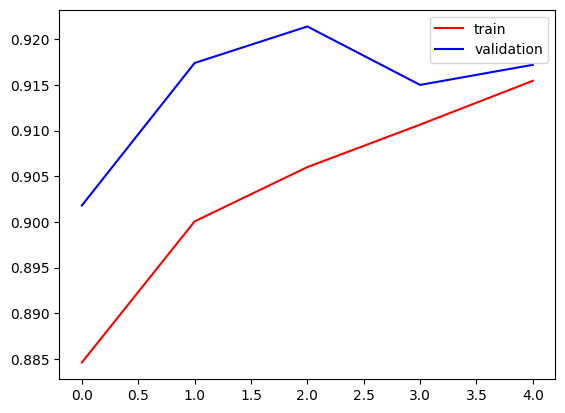

In [16]:
# Plotting graph of training and validation accuracy

import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color='red', label='train')
plt.plot(history.history["val_accuracy"], color='blue', label='validation')
plt.legend()
plt.show()

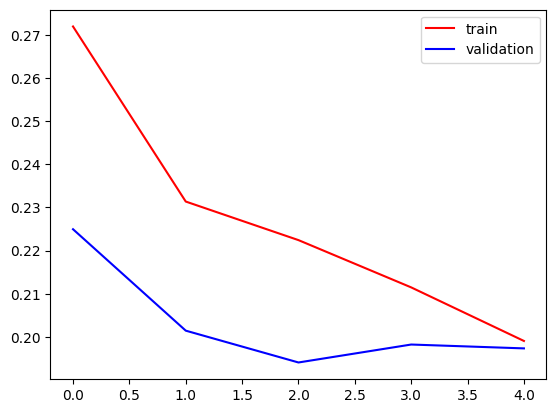

In [17]:
# Plotting graph of training and validation loss

plt.plot(history.history["loss"], color='red', label='train')
plt.plot(history.history["val_loss"], color='blue', label='validation')
plt.legend()
plt.show()

**After Data Augmentation accuracy and loss of training and test set is almost similar. Hence, problem of overfitting not occurs.**